In [ ]:
#Code for generating all Eigen Faces

Loading Eigen Faces 

Setting Installs

In [ ]:
#Import Google Drive
# TODO: Import drive if you are a colab user
from google.colab import drive # Link your drive if you are a colab user
drive.mount('/content/drive', force_remount=True) 

Mounted at /content/drive


In [ ]:
!nvidia-smi

Sat Dec 10 00:57:22 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    28W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Import libraries
from matplotlib import pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
import cv2
from glob import glob
import matplotlib.pyplot as plt

from time import time
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.utils.fixes import loguniform

!pip install pycuda
!pip install scikit-cuda

import pycuda.autoinit
import pycuda.gpuarray as gpuarray
import skcuda.linalg as linalg
from skcuda.linalg import PCA as cuPCA

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 31.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 71 kB 10.9 MB/s 
     |████████████████████████████████| 78 kB 8.5 MB/s 
  Created wheel for pycuda: filename=pycuda-2022.2-cp38-cp38-linux_x86_64.whl size=646470 sha256=18bcec32532fc2966325f910eda5cdf2abd59ba72b078d8bf3e3fa66df6c5841
  Stored in directory: /root/.cache/pip/wheels/ef/0e/11/809b20ee6df2e1c63ef52b3dcf2b7386b900d4f58548f0484e
  Created wheel for pytools: filename=pytools-2022.1.13-py2.py3-none-any.whl size=66024 sha256=dbe5f2b7318177114dc601e7e71753fcf8d01f4c4430ef951bbbc427b8c5eee6
  Stored in directory: /root/.cache/pip/wheels/b5/c1/bb/26ba70fb9d10f195249ef4e170a92ae83e7534e55b67786fd9
Successfully built pycuda pytools
Looking in indexes: https://pypi.o

/usr/local/lib/python3.8/dist-packages/skcuda/cublas.py:284: UserWarning: creating CUBLAS context to get version number
  warnings.warn('creating CUBLAS context to get version number')


In [ ]:
# Metadata
!pip install watermark
%load_ext watermark
%watermark -a "Vutsal Singhal"
%watermark -u -n -t -z
%watermark -p numpy,matplotlib
%watermark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 35.0 MB/s 
Author: Vutsal Singhal

Last updated: Sat Dec 10 2022 00:59:30UTC

numpy     : 1.21.6
matplotlib: 3.2.2

Last updated: 2022-12-10T00:59:30.310607+00:00

Python implementation: CPython
Python version       : 3.8.16
IPython version      : 7.9.0

Compiler    : GCC 7.5.0
OS          : Linux
Release     : 5.10.133+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [ ]:
!cd /content/drive/MyDrive/IDL_Project/Face-Dataset
!unzip -qo '/content/drive/MyDrive/IDL_Project/Face-Dataset/VGG_ALL_FRONTAL.zip' -d VGG_ALL_FRONTAL

In [ ]:
dataset_path = '/content/VGG_ALL_FRONTAL/VGG_ALL_FRONTAL'
people_names  = os.listdir(dataset_path)

width  = 128
height = 128

In [ ]:
identities = glob('/content/VGG_ALL_FRONTAL/VGG_ALL_FRONTAL/**')

In [ ]:
# lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# # introspect the images arrays to find the shapes (for plotting)
# n_samples, h, w = lfw_people.images.shape

# # for machine learning we use the 2 data directly (as relative pixel
# # positions info is ignored by this model)
# X = lfw_people.data
# n_features = X.shape[1]

# # the label to predict is the id of the person
# y = lfw_people.target
# target_names = lfw_people.target_names
# n_classes = target_names.shape[0]

# print("Total dataset size:")
# print("n_samples: %d" % n_samples)
# print("n_features: %d" % n_features)
# print("n_classes: %d" % n_classes)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.25, random_state=42
# )

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [ ]:
identities = glob('/content/VGG_ALL_FRONTAL/VGG_ALL_FRONTAL/**')

In [ ]:
train = []
test = []
for r in range(10):
    count =1;
    for i in range(len(identities)):
        face = glob(identities[i] + '/*jpg')[0]
        if count%4!=0:
          train.append(face)
          count = count+1
        else:
          test.append(face)
          count += 1  

import sklearn # train_test_split(faces, test_split=0.2)

In [ ]:
print("The number of Train Images are")
len(train)

The number of Train Images are


19160

In [ ]:
print("The number of Test Images are")
len(test)


The number of Test Images are


6380

In [ ]:
len(train)+len(test)

25540

In [ ]:
def load_img(filepath:os.PathLike):
    img = cv2.imread(filepath)
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
main_tensor_train = np.ndarray(shape=(len(train), 128**2), dtype=np.float64)
main_tensor_test = np.ndarray(shape=(len(test), 128**2), dtype=np.float64)

for idx, file in enumerate(train):
    img = load_img(file)
    img = img.flatten()
    main_tensor_train[idx] = img

for idx, file in enumerate(test):
    img = load_img(file)
    img = img.flatten()
    main_tensor_test[idx] = img

In [ ]:
main_tensor_train.shape,main_tensor_test.shape


((19160, 16384), (6380, 16384))

In [ ]:
mean_face_train = main_tensor_train.mean(axis=0)
np.shape(mean_face_train)
mean_face_test = main_tensor_test.mean(axis=0)
np.shape(mean_face_test)

(16384,)

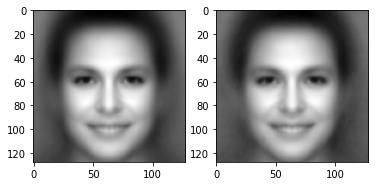

In [ ]:
plt.subplot(1,2,1)
plt.imshow(mean_face_train.reshape(128, 128), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(mean_face_test.reshape(128, 128), cmap='gray')

In [ ]:
# n_components = 5000
# h =128
# w = 128

# print(
#     "Extracting the top %d eigenfaces from %d faces" % (n_components, main_tensor_train.shape[0])
# )
# t0 = time()
# pca = cuPCA(n_components=n_components)

# X_gpu = gpuarray.GPUArray(main_tensor_train.shape, np.float64, order="F")
# X_gpu.set(main_tensor_train)

# eigenfaces = pca.fit_transform(X_gpu)

# print("done in %0.3fs" % (time() - t0))

# print("Projecting the Input data on the eigenfaces orthonormal basis")
# t0 = time()
# X_train_pca = pca.transform(main_tensor_train)
# X_test_pca = pca.transform(main_tensor_test)
# print("done in %0.3fs" % (time() - t0))

In [ ]:
n_components = 5000
h =128
w = 128

print(
    "Extracting the top %d eigenfaces from %d faces" % (n_components, main_tensor_train.shape[0])
)
t0 = time()
pca = PCA(n_components=n_components, svd_solver="randomized", whiten=False).fit(main_tensor_train)
print("done in %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("Projecting the Input data on the eigenfaces orthonormal basis")
t0 = time()
X_train_pca = pca.transform(main_tensor_train)
X_test_pca = pca.transform(main_tensor_test)
print("done in %0.3fs" % (time() - t0))

Extracting the top 5000 eigenfaces from 19160 faces
done in 891.926s
Projecting the Input data on the eigenfaces orthonormal basis
done in 77.690s


In [ ]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

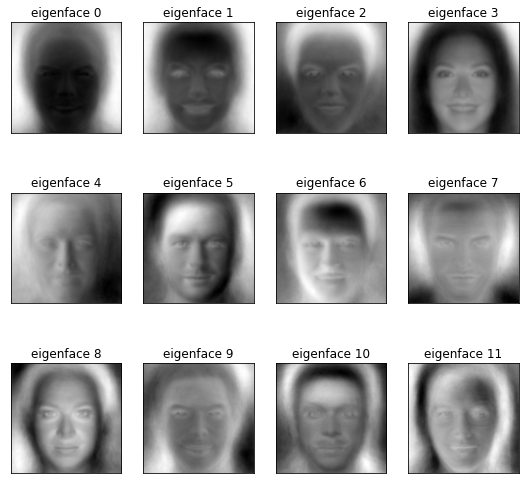

In [ ]:
eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

plt.show()

Reconstructing Validation dataset

In [ ]:
main_tensor_test[0], main_tensor_train[0]

(array([23., 25., 27., ...,  9.,  7.,  6.]),
 array([199., 173., 148., ..., 116., 138., 156.]))

In [ ]:
np.shape(X_train_pca)
np.shape(eigenfaces)
eigen_vectors  = np.reshape(eigenfaces,[n_components,h*w])
Faces_reconstructed_train = np.dot(X_train_pca,eigen_vectors)
np.shape(Faces_reconstructed_train)
Faces_reconstructed_train = np.reshape(Faces_reconstructed_train,[main_tensor_train.shape[0],h,w])
np.shape(Faces_reconstructed_train)

(19160, 128, 128)

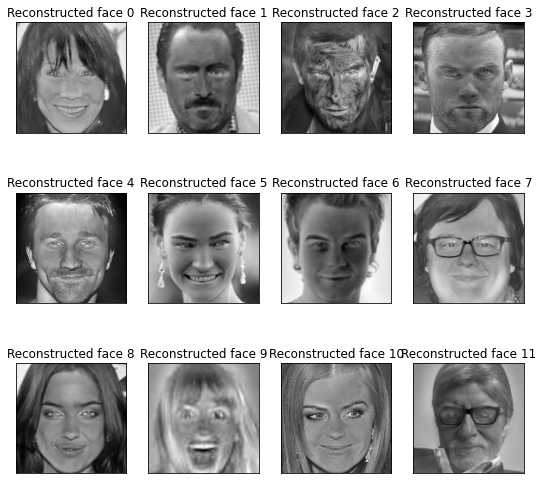

In [ ]:
face_titles = ["Reconstructed face %d" % i for i in range(Faces_reconstructed_train.shape[0])]
plot_gallery(Faces_reconstructed_train, face_titles, h, w)

plt.show()

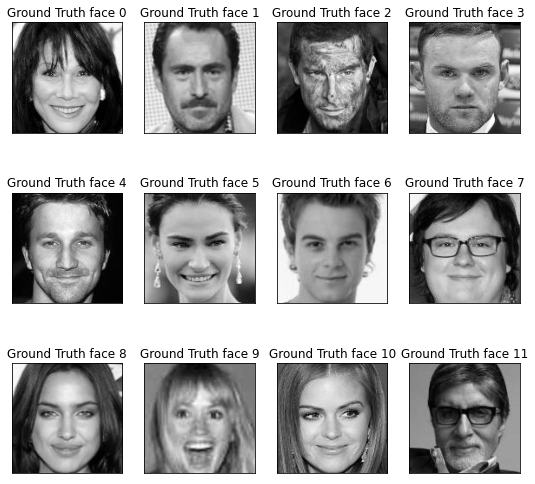

In [ ]:
main_tensor_train = np.reshape(main_tensor_train,[X_train_pca.shape[0],h,w])
face_titles = ["Ground Truth face %d" % i for i in range(main_tensor_train.shape[0])]
plot_gallery(main_tensor_train, face_titles, h, w)

plt.show()

Text(0.5, 1.0, 'Person 1')

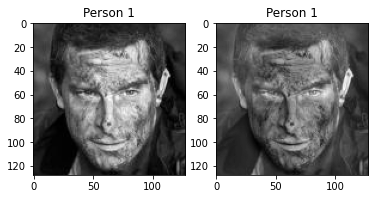

In [ ]:
plt.subplot(1,2,1)
plt.imshow(main_tensor_train[2,:,:],cmap='gray')
plt.title("Person 1", size=12)
plt.subplot(1,2,2)
plt.imshow(Faces_reconstructed_train[2,:,:],cmap='gray')
plt.title("Person 1", size=12)

Reconstructing Test data set (Faces not seen in Train)

In [ ]:
np.shape(X_test_pca)
np.shape(eigenfaces)
eigen_vectors  = np.reshape(eigenfaces,[n_components,h*w])
Faces_reconstructed_test = np.dot(X_test_pca,eigen_vectors)
np.shape(Faces_reconstructed_test)
Faces_reconstructed_test = np.reshape(Faces_reconstructed_test,[main_tensor_test.shape[0],h,w])
np.shape(Faces_reconstructed_test)

(6380, 128, 128)

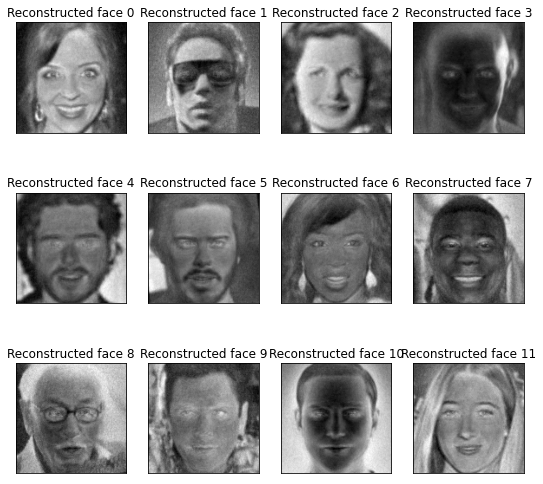

In [ ]:
face_titles = ["Reconstructed face %d" % i for i in range(Faces_reconstructed_test.shape[0])]
plot_gallery(Faces_reconstructed_test, face_titles, h, w)

plt.show()

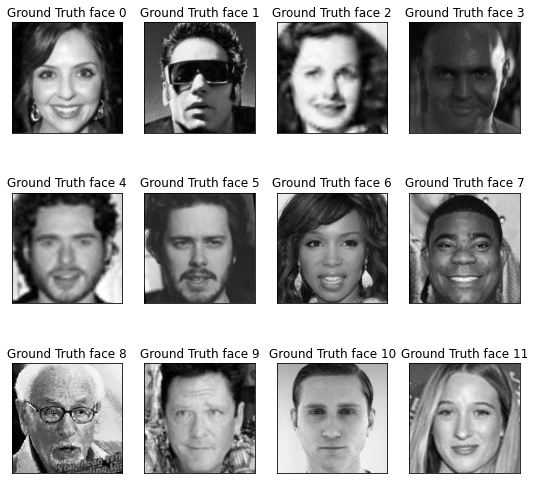

In [ ]:
main_tensor_test = np.reshape(main_tensor_test,[X_test_pca.shape[0],h,w])
face_titles = ["Ground Truth face %d" % i for i in range(main_tensor_test.shape[0])]
plot_gallery(main_tensor_test, face_titles, h, w)

plt.show()

Text(0.5, 1.0, 'Person 1- Recostructed')

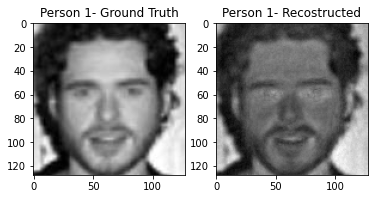

In [ ]:
plt.subplot(1,2,1)
plt.imshow(main_tensor_test[4,:,:],cmap='gray')
plt.title("Person 1- Ground Truth", size=12)
plt.subplot(1,2,2)
plt.imshow(Faces_reconstructed_test[4,:,:],cmap='gray')
plt.title("Person 1- Recostructed", size=12)

In [ ]:
np.save("/content/drive/MyDrive/IDL_Project/input_images_train_30k" +str(n_components)+".npy",main_tensor_train, allow_pickle=True, fix_imports=True)
np.save("/content/drive/MyDrive/IDL_Project/input_images_test_30k" +str(n_components)+ ".npy",main_tensor_test, allow_pickle=True, fix_imports=True)
np.save("/content/drive/MyDrive/IDL_Project/eigen_vectors_30k_30k" + str(n_components)+ ".npy", eigen_vectors, allow_pickle=True, fix_imports=True)
np.save("/content/drive/MyDrive/IDL_Project/train_data_projection_vectors_30k" + str(n_components)+ ".npy", X_train_pca, allow_pickle=True, fix_imports=True)
np.save("/content/drive/MyDrive/IDL_Project/test_data_projection_vectors_30k" + str(n_components)+ ".npy", X_test_pca, allow_pickle=True, fix_imports=True)


In [ ]:
%pwd

'/content'

In [ ]:
!cp *.npy drive/MyDrive/

cp: cannot stat '*.npy': No such file or directory


Loading Hanzhi's Model